In [ ]:
'''
1. 시각적으로 표현할 분석 소주제 5개 이상 선정
2. 전처리(결측/이상/중복) 모두 처지 진행
    - 이상치 계산 가능한 데이터는 계산하여 이상데이터 확인
3. 주제별 시각화 그래프 2개 이상
-------------------------------------------------------------
4. 주제별 분석내용 작성 : 개인별로 작성
5. 제출 : 분석내용 + 가공데이터파일 + ipynb 파일
    - 제출 형식 : 모두 압축해서 : 본인이름.zip
    - 제출 위치 : 구글드라이브 > 3_산출물 > 1_심평원분석 
6. 문제해결 : 조별로 스터디하면서 해결
'''

### 진료과목 코드를 이용하여 연령에 따른 진료 통계

In [1]:
import pandas as pd

In [73]:
file_path = './files_new2/df_kor_20table_명세서일반내역.xlsx'
df_20TABLE = pd.read_excel(file_path, usecols="Q,I")
df_20TABLE

,수진자연령,진료과목코드
0,62,1
1,74,0
2,14,3
3,68,54
4,19,1
...,...,...
5626,9,56
5627,20,1
5628,4,11
5629,47,5


In [59]:
df_20TABLE.isnull().sum()

수진자연령     0
진료과목코드    0
dtype: int64

In [74]:
df_20TABLE['진료과목코드'] = df_20TABLE['진료과목코드'].astype(str)

In [75]:
df_20TABLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   수진자연령   5631 non-null   int64 
 1   진료과목코드  5631 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.1+ KB


In [76]:
df_20TABLE['진료과목코드'].str.zfill(2)

0       01
1       00
2       03
3       54
4       01
        ..
5626    56
5627    01
5628    11
5629    05
5630    13
Name: 진료과목코드, Length: 5631, dtype: object

In [97]:
df_20TABLE['진료과목코드'] =  df_20TABLE['진료과목코드'].str.zfill(2)

In [98]:
df_20TABLE

,수진자연령,진료과목코드
0,62,01
1,74,00
2,14,03
3,68,54
4,19,01
...,...,...
5626,9,56
5627,20,01
5628,4,11
5629,47,05


In [8]:
df_CODE = pd.read_excel('./표본자료 변수 테이블(2012-2013).xlsx', sheet_name=5, usecols="B,C", skiprows=2 )
df_CODE

,DGSBJT_CD,Unnamed: 2
0,00,일반의
1,01,내과
2,02,신경과
3,03,정신과
4,04,외과
...,...,...
76,NaN,47
77,NaN,52
78,NaN,55
79,NaN,57


In [16]:
df_CODE = df_CODE.loc[:47]
df_CODE

,DGSBJT_CD,Unnamed: 2
0,00,일반의
1,01,내과
2,02,신경과
3,03,정신과
4,04,외과
5,05,정형외과
6,06,신경외과
7,07,흉부외과
8,08,성형외과
9,09,마취통증의학과


In [18]:
df_CODE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DGSBJT_CD   48 non-null     object
 1   Unnamed: 2  48 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


In [162]:
df_CODE.columns=['진료과목코드','과이름']

In [163]:
df_CODE

,진료과목코드,과이름
0,00,일반의
1,01,내과
2,02,신경과
3,03,정신과
4,04,외과
5,05,정형외과
6,06,신경외과
7,07,흉부외과
8,08,성형외과
9,09,마취통증의학과


In [164]:
df_20TABLE

,수진자연령,진료과목코드
0,62,01
1,74,00
2,14,03
3,68,54
4,19,01
...,...,...
5626,9,56
5627,20,01
5628,4,11
5629,47,05


In [62]:
df_CODE

,진료과목코드,병원
0,00,일반의
1,01,내과
2,02,신경과
3,03,정신과
4,04,외과
5,05,정형외과
6,06,신경외과
7,07,흉부외과
8,08,성형외과
9,09,마취통증의학과


In [170]:
year_list = ["1대", "10대", "20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대"]

# 모든 연령대를 1개의 데이터프레임으로 통합하기
df_20TABLE_any = pd.DataFrame()

# 연령대 필터링 범위 계산에 사용
num = 0

for i in range(0, len(year_list), 1) :    
    df_temp =  df_20TABLE[(df_20TABLE["수진자연령"] >= num) & (df_20TABLE["수진자연령"] < num+10)]
    df_temp = df_temp.reset_index(drop=True)
    df_20TABLE['진료과목코드'] = df_20TABLE['진료과목코드'].astype(str)
    df_20TABLE['진료과목코드'] = df_20TABLE['진료과목코드'].str.zfill(2)

    df_temp["연령대"] = year_list[i]
    df_20TABLE_any = pd.concat([df_20TABLE_any, df_temp], ignore_index=True)
    
    num += 10

df_20TABLE_any = df_20TABLE_any.reset_index(drop=True)
print()
print("총 행의 갯수 : ", len(df_20TABLE_any))
df_20TABLE_any


총 행의 갯수 :  5631


,수진자연령,진료과목코드,연령대
0,3,23,1대
1,6,01,1대
2,3,55,1대
3,6,01,1대
4,6,11,1대
...,...,...,...
5626,94,01,90대
5627,94,14,90대
5628,94,01,90대
5629,94,01,90대


In [137]:
df_20TABLE_any

,수진자연령,진료과목코드,연령대
0,3,23,1대
1,6,01,1대
2,3,55,1대
3,6,01,1대
4,6,11,1대
...,...,...,...
5626,94,01,90대
5627,94,14,90대
5628,94,01,90대
5629,94,01,90대


In [171]:
df_CODE['진료과목코드'] = df_CODE['진료과목코드'].astype(str)

In [172]:
df_20TABLE_S = pd.merge(df_20TABLE_any, df_CODE, how='left', on='진료과목코드')
df_20TABLE_S

,수진자연령,진료과목코드,연령대,과이름
0,3,23,1대,가정의학과
1,6,01,1대,내과
2,3,55,1대,치과보존과
3,6,01,1대,내과
4,6,11,1대,소아청소년과
...,...,...,...,...
5626,94,01,90대,내과
5627,94,14,90대,피부과
5628,94,01,90대,내과
5629,94,01,90대,내과


In [185]:
# 연령대별 병원 집계
pivot_age_H = df_20TABLE_S.pivot_table(values = '수진자연령',
                                       index = '과이름',
                                       columns= '연령대',
                                       aggfunc= 'count')

pivot_age_H = pivot_age_H.fillna(0)       

In [189]:
pivot_age_H

연령대,10대,1대,20대,30대,40대,50대,60대,70대,80대,90대
과이름,,,,,,,,,,
가정의학과,20.0,17.0,5.0,11.0,46.0,19.0,40.0,44.0,39.0,0.0
구강내과,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
구강악안면외과,4.0,0.0,14.0,3.0,15.0,4.0,9.0,12.0,3.0,0.0
내과,69.0,29.0,66.0,138.0,191.0,363.0,438.0,464.0,44.0,6.0
마취통증의학과,0.0,0.0,0.0,0.0,0.0,49.0,97.0,8.0,0.0,0.0
비뇨기과,1.0,3.0,3.0,0.0,3.0,39.0,12.0,27.0,6.0,1.0
산부인과,1.0,2.0,26.0,42.0,19.0,8.0,9.0,1.0,0.0,0.0
성형외과,5.0,0.0,1.0,3.0,4.0,0.0,0.0,4.0,0.0,0.0
소아청소년과,45.0,398.0,5.0,1.0,2.0,0.0,9.0,8.0,0.0,0.0


In [202]:
pivot_age_H_T = df_20TABLE_S.pivot_table(values = '수진자연령',
                                       index = '연령대',
                                       columns= '과이름',
                                       aggfunc= 'count')

pivot_age_H_T = pivot_age_H_T.fillna(0)       

In [203]:
pivot_age_H_T

과이름,가정의학과,구강내과,구강악안면외과,내과,마취통증의학과,비뇨기과,산부인과,성형외과,소아청소년과,소아치과,...,일반의,재활의학과,정신과,정형외과,치과,치과보존과,치과보철과,치주과,피부과,흉부외과
연령대,,,,,,,,,,,,,,,,,,,,,
10대,20.0,0.0,4.0,69.0,0.0,1.0,1.0,5.0,45.0,1.0,...,6.0,0.0,59.0,33.0,2.0,21.0,0.0,2.0,41.0,0.0
1대,17.0,1.0,0.0,29.0,0.0,3.0,2.0,0.0,398.0,21.0,...,4.0,0.0,0.0,27.0,0.0,20.0,0.0,0.0,21.0,1.0
20대,5.0,0.0,14.0,66.0,0.0,3.0,26.0,1.0,5.0,0.0,...,0.0,1.0,4.0,30.0,0.0,28.0,2.0,6.0,21.0,0.0
30대,11.0,0.0,3.0,138.0,0.0,0.0,42.0,3.0,1.0,0.0,...,2.0,0.0,17.0,78.0,0.0,10.0,0.0,5.0,40.0,1.0
40대,46.0,0.0,15.0,191.0,0.0,3.0,19.0,4.0,2.0,0.0,...,1.0,56.0,2.0,99.0,0.0,26.0,0.0,15.0,62.0,2.0
50대,19.0,0.0,4.0,363.0,49.0,39.0,8.0,0.0,0.0,0.0,...,21.0,0.0,10.0,153.0,0.0,38.0,0.0,27.0,29.0,0.0
60대,40.0,0.0,9.0,438.0,97.0,12.0,9.0,0.0,9.0,0.0,...,19.0,12.0,8.0,207.0,0.0,49.0,1.0,18.0,24.0,1.0
70대,44.0,0.0,12.0,464.0,8.0,27.0,1.0,4.0,8.0,0.0,...,35.0,8.0,30.0,128.0,0.0,20.0,0.0,8.0,25.0,0.0
80대,39.0,0.0,3.0,44.0,0.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0


In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'연령에 따른 진료 통계'}, xlabel='과이름'>

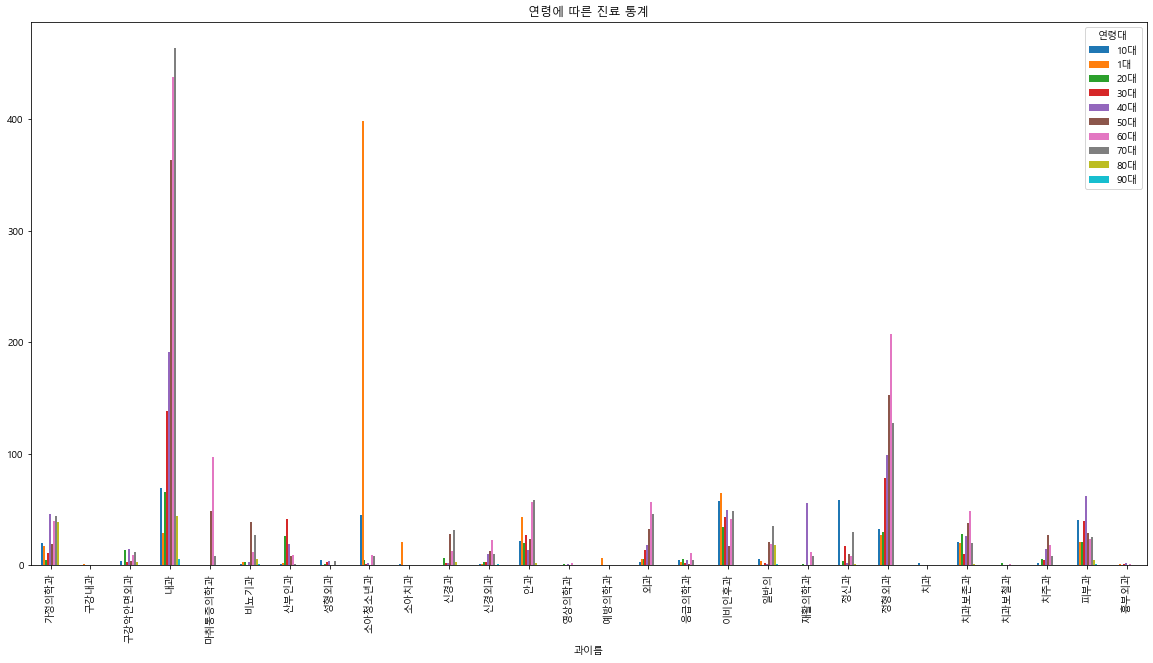

In [205]:
pivot_age_H.plot(kind='bar', title = '연령에 따른 진료 통계')


<AxesSubplot:title={'center':'연령에 따른 진료 통계'}, xlabel='연령대'>

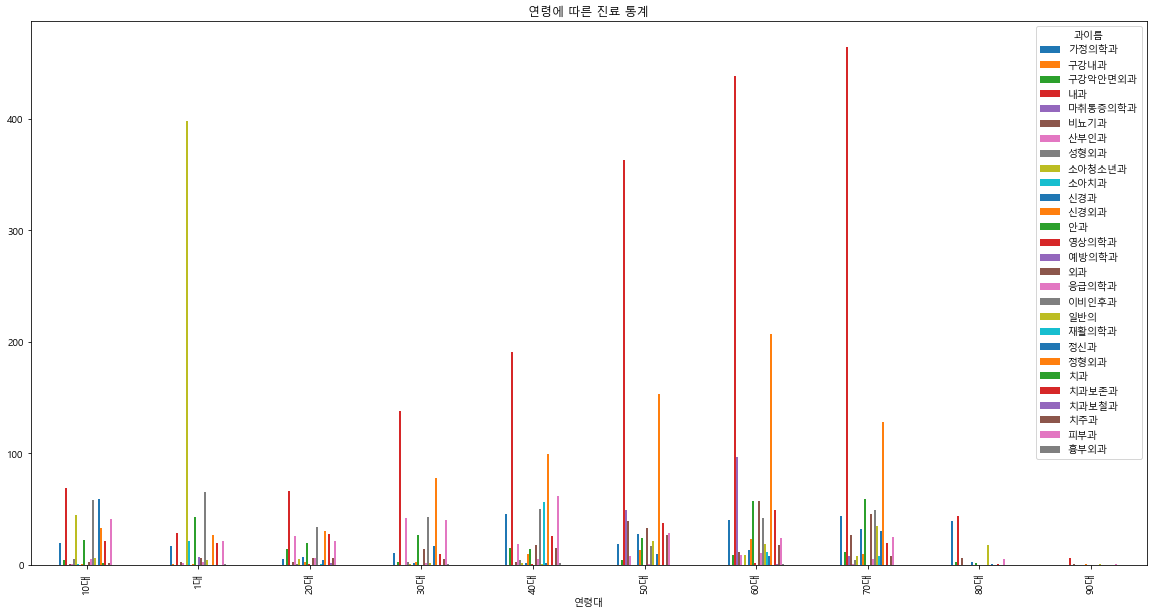

In [204]:
pivot_age_H_T.plot(kind='bar', title = '연령에 따른 진료 통계')

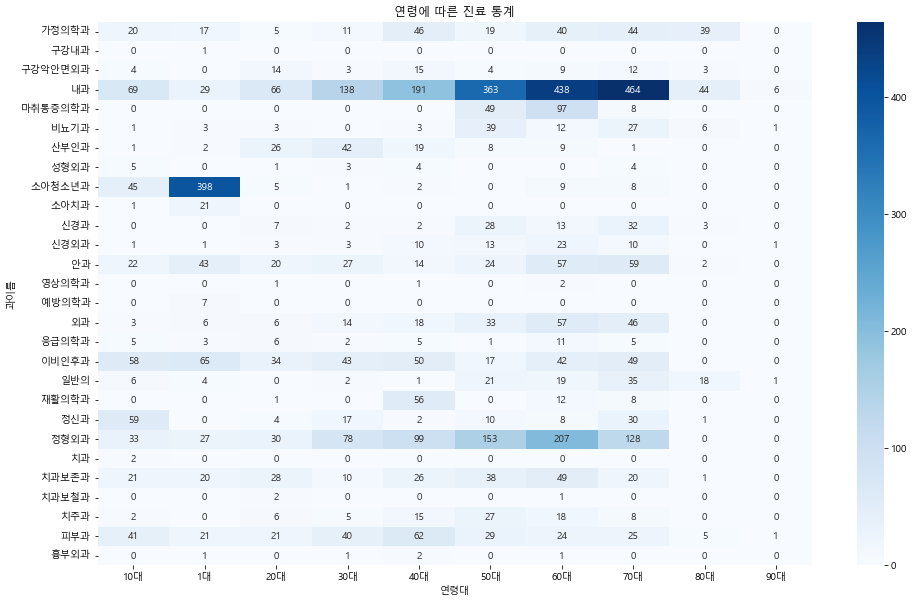

In [188]:
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_age_H, annot=True, fmt=".0f", cmap="Blues")
plt.title("연령에 따른 진료 통계")
plt.show()

In [294]:
pivot_age_H.to_excel('연령에 따른 진료 통계.xlsx')


### 과별 본인부담금 확인

In [286]:
df_money = pd.read_excel(file_path, usecols="Q, Y")
df_money['진료과목코드'] = df_money['진료과목코드'].astype(str)
df_money['진료과목코드'] =  df_money['진료과목코드'].str.zfill(2)
df_money


,진료과목코드,심결본인부담금
0,01,2800
1,00,500
2,03,1300
3,54,7900
4,01,2800
...,...,...
5626,56,3900
5627,01,3500
5628,11,2900
5629,05,2800


In [287]:
df_money_S = pd.merge(df_money, df_CODE, how='left', on='진료과목코드')
df_money_S

,진료과목코드,심결본인부담금,과이름
0,01,2800,내과
1,00,500,일반의
2,03,1300,정신과
3,54,7900,치주과
4,01,2800,내과
...,...,...,...
5626,56,3900,구강내과
5627,01,3500,내과
5628,11,2900,소아청소년과
5629,05,2800,정형외과


In [277]:
df_All = df_money_S.pivot_table(values = '심결본인부담금',
                        index = '과이름',
                        aggfunc= 'sum')

df_All

,심결본인부담금
과이름,
가정의학과,1112900
구강내과,3900
구강악안면외과,633700
내과,15165910
마취통증의학과,1439800
비뇨기과,702500
산부인과,810310
성형외과,238800
소아청소년과,2057240


<AxesSubplot:title={'center':'과별 심결본인부담금'}, xlabel='과이름'>

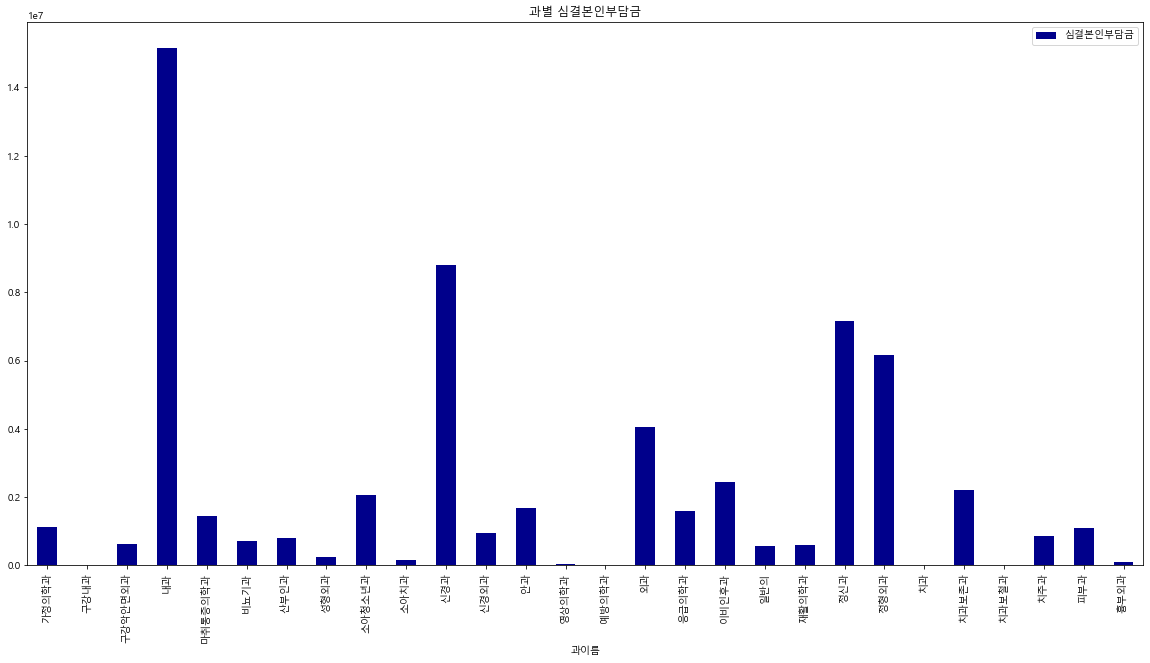

In [291]:
df_All.plot(kind='bar', title = '과별 심결본인부담금', color = 'darkblue')


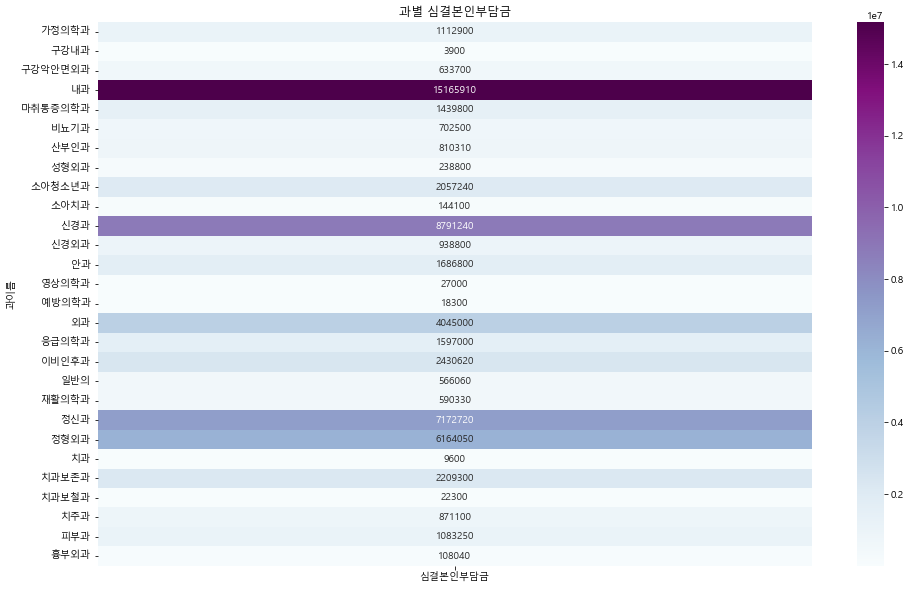

In [280]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_All, annot=True, fmt=".0f", cmap="BuPu")
plt.title("과별 심결본인부담금")
plt.show()

In [293]:
df_All.to_excel('과별 심결본인부담금.xlsx')